In [62]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob, Word
sns.set_style("whitegrid")
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

In [63]:
df0=pd.read_csv("Recommended/laptop.csv")
df1=pd.read_csv("Recommended/Abileklik.csv")
df2=pd.read_csv("Recommended/Asaat.csv")
df3=pd.read_csv("Recommended/cepTel.csv")
df4=pd.read_csv("Recommended/DFM.csv")
df5=pd.read_csv("Recommended/FotoM.csv")
df6=pd.read_csv("Recommended/masaustu.csv")
df7=pd.read_csv("Recommended/Projeksiyon.csv")
df8=pd.read_csv("Recommended/SmartTv.csv")
df9=pd.read_csv("Recommended/tablet.csv")
df10=pd.read_csv("Recommended/tv.csv")
df11=pd.read_csv("Recommended/VKamera.csv")
df12=pd.read_csv("Recommended/VrGozluk.csv")

In [64]:
df=pd.concat([df0,df1,df2,df3,df4,df5,df6,df7,
              df8,df9,df10,df11,df12], ignore_index=True)

In [65]:
df.head()

,Unnamed: 0,productType,productLink,productPrice,productInfo,productName
0,0,HP,https://www.trendyol.com//hp/250-g8-core-i5-11...,10.999 TL,250 G8/Core I5-1135G7 İşlemci/ 8GB Ram/ 256GB ...,Laptop
1,1,Casper,https://www.trendyol.com//casper/nirvana-x600-...,12.599 TL,Nirvana X600.139H-DF00X-G-F Intel Core i7-113...,Laptop
2,2,Dell,https://www.trendyol.com//dell/vostro-3520-i5-...,33.999 TL,"Vostro 3520 I5-1135G7 8 GB 256 GB SSD 15.6"" Fh...",Laptop
3,3,Casper,https://www.trendyol.com//casper/excalibur-g87...,16.299 TL,Excalibur G870.1265-DFA0X-B Intel Core i7-1265...,Laptop
4,4,Casper,https://www.trendyol.com//casper/nirvana-c370-...,6.999 TL,Nirvana C370.4020-4C00B Intel Celeron N4020 4G...,Laptop


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21779 entries, 0 to 21778
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    21779 non-null  int64 
 1   productType   21779 non-null  object
 2   productLink   21779 non-null  object
 3   productPrice  21779 non-null  object
 4   productInfo   21779 non-null  object
 5   productName   21779 non-null  object
dtypes: int64(1), object(5)
memory usage: 1021.0+ KB


In [67]:
df.head()

,Unnamed: 0,productType,productLink,productPrice,productInfo,productName
0,0,HP,https://www.trendyol.com//hp/250-g8-core-i5-11...,10.999 TL,250 G8/Core I5-1135G7 İşlemci/ 8GB Ram/ 256GB ...,Laptop
1,1,Casper,https://www.trendyol.com//casper/nirvana-x600-...,12.599 TL,Nirvana X600.139H-DF00X-G-F Intel Core i7-113...,Laptop
2,2,Dell,https://www.trendyol.com//dell/vostro-3520-i5-...,33.999 TL,"Vostro 3520 I5-1135G7 8 GB 256 GB SSD 15.6"" Fh...",Laptop
3,3,Casper,https://www.trendyol.com//casper/excalibur-g87...,16.299 TL,Excalibur G870.1265-DFA0X-B Intel Core i7-1265...,Laptop
4,4,Casper,https://www.trendyol.com//casper/nirvana-c370-...,6.999 TL,Nirvana C370.4020-4C00B Intel Celeron N4020 4G...,Laptop


In [68]:
df.isna().sum()[df.isna().sum() > 0]

Series([], dtype: int64)

In [69]:
df.isnull().sum()

Unnamed: 0      0
productType     0
productLink     0
productPrice    0
productInfo     0
productName     0
dtype: int64

In [70]:
df[df.duplicated()]

,Unnamed: 0,productType,productLink,productPrice,productInfo,productName


In [71]:
copydf=df
copydf

,Unnamed: 0,productType,productLink,productPrice,productInfo,productName
0,0,HP,https://www.trendyol.com//hp/250-g8-core-i5-11...,10.999 TL,250 G8/Core I5-1135G7 İşlemci/ 8GB Ram/ 256GB ...,Laptop
1,1,Casper,https://www.trendyol.com//casper/nirvana-x600-...,12.599 TL,Nirvana X600.139H-DF00X-G-F Intel Core i7-113...,Laptop
2,2,Dell,https://www.trendyol.com//dell/vostro-3520-i5-...,33.999 TL,"Vostro 3520 I5-1135G7 8 GB 256 GB SSD 15.6"" Fh...",Laptop
3,3,Casper,https://www.trendyol.com//casper/excalibur-g87...,16.299 TL,Excalibur G870.1265-DFA0X-B Intel Core i7-1265...,Laptop
4,4,Casper,https://www.trendyol.com//casper/nirvana-c370-...,6.999 TL,Nirvana C370.4020-4C00B Intel Celeron N4020 4G...,Laptop
...,...,...,...,...,...,...
21774,283,ZMOBILE,https://www.trendyol.com//zmobile/sanal-gercek...,"1.493,90 TL",Sanal Gerçeklik Gözlüğü Kulaklıklı Kablosuz Bl...,Vr Gözlük
21775,284,Müstesna,https://www.trendyol.com//mustesna/antiradyasy...,"2.066,08 TL",Antiradyasyon Anti Blue Light Teknoloji Gözlüğ...,Vr Gözlük
21776,285,Dolia,https://www.trendyol.com//dolia/tum-telefonlar...,1.924 TL,Tüm Telefonlar Uyumlu 3d Vr Sanal Gerçeklik Gö...,Vr Gözlük
21777,286,Dolia,https://www.trendyol.com//dolia/tum-telefonlar...,1.400 TL,Tüm Telefonlar Uyumlu 3d Vr Sanal Gerçeklik Gö...,Vr Gözlük


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21779 entries, 0 to 21778
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    21779 non-null  int64 
 1   productType   21779 non-null  object
 2   productLink   21779 non-null  object
 3   productPrice  21779 non-null  object
 4   productInfo   21779 non-null  object
 5   productName   21779 non-null  object
dtypes: int64(1), object(5)
memory usage: 1021.0+ KB


In [73]:
df.duplicated().sum()

0

In [74]:
df.productPrice=df.productPrice.str.rstrip(" TL")

In [75]:
df.productPrice

0          10.999
1          12.599
2          33.999
3          16.299
4           6.999
           ...   
21774    1.493,90
21775    2.066,08
21776       1.924
21777       1.400
21778       2.795
Name: productPrice, Length: 21779, dtype: object

In [76]:
df[df.productPrice.str.isnumeric()==False]

,Unnamed: 0,productType,productLink,productPrice,productInfo,productName
0,0,HP,https://www.trendyol.com//hp/250-g8-core-i5-11...,10.999,250 G8/Core I5-1135G7 İşlemci/ 8GB Ram/ 256GB ...,Laptop
1,1,Casper,https://www.trendyol.com//casper/nirvana-x600-...,12.599,Nirvana X600.139H-DF00X-G-F Intel Core i7-113...,Laptop
2,2,Dell,https://www.trendyol.com//dell/vostro-3520-i5-...,33.999,"Vostro 3520 I5-1135G7 8 GB 256 GB SSD 15.6"" Fh...",Laptop
3,3,Casper,https://www.trendyol.com//casper/excalibur-g87...,16.299,Excalibur G870.1265-DFA0X-B Intel Core i7-1265...,Laptop
4,4,Casper,https://www.trendyol.com//casper/nirvana-c370-...,6.999,Nirvana C370.4020-4C00B Intel Celeron N4020 4G...,Laptop
...,...,...,...,...,...,...
21774,283,ZMOBILE,https://www.trendyol.com//zmobile/sanal-gercek...,"1.493,90",Sanal Gerçeklik Gözlüğü Kulaklıklı Kablosuz Bl...,Vr Gözlük
21775,284,Müstesna,https://www.trendyol.com//mustesna/antiradyasy...,"2.066,08",Antiradyasyon Anti Blue Light Teknoloji Gözlüğ...,Vr Gözlük
21776,285,Dolia,https://www.trendyol.com//dolia/tum-telefonlar...,1.924,Tüm Telefonlar Uyumlu 3d Vr Sanal Gerçeklik Gö...,Vr Gözlük
21777,286,Dolia,https://www.trendyol.com//dolia/tum-telefonlar...,1.400,Tüm Telefonlar Uyumlu 3d Vr Sanal Gerçeklik Gö...,Vr Gözlük


In [77]:
df.productPrice=df.productPrice.str.replace('.','').str.replace(',','')

In [78]:
df.productPrice=df.productPrice.astype(float)

In [79]:
df.productPrice

0         10999.0
1         12599.0
2         33999.0
3         16299.0
4          6999.0
           ...   
21774    149390.0
21775    206608.0
21776      1924.0
21777      1400.0
21778      2795.0
Name: productPrice, Length: 21779, dtype: float64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21779 entries, 0 to 21778
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    21779 non-null  int64  
 1   productType   21779 non-null  object 
 2   productLink   21779 non-null  object 
 3   productPrice  21779 non-null  float64
 4   productInfo   21779 non-null  object 
 5   productName   21779 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1021.0+ KB


In [81]:
df.head()

,Unnamed: 0,productType,productLink,productPrice,productInfo,productName
0,0,HP,https://www.trendyol.com//hp/250-g8-core-i5-11...,10999.0,250 G8/Core I5-1135G7 İşlemci/ 8GB Ram/ 256GB ...,Laptop
1,1,Casper,https://www.trendyol.com//casper/nirvana-x600-...,12599.0,Nirvana X600.139H-DF00X-G-F Intel Core i7-113...,Laptop
2,2,Dell,https://www.trendyol.com//dell/vostro-3520-i5-...,33999.0,"Vostro 3520 I5-1135G7 8 GB 256 GB SSD 15.6"" Fh...",Laptop
3,3,Casper,https://www.trendyol.com//casper/excalibur-g87...,16299.0,Excalibur G870.1265-DFA0X-B Intel Core i7-1265...,Laptop
4,4,Casper,https://www.trendyol.com//casper/nirvana-c370-...,6999.0,Nirvana C370.4020-4C00B Intel Celeron N4020 4G...,Laptop


In [82]:
df.productInfo

0        250 G8/Core I5-1135G7 İşlemci/ 8GB Ram/ 256GB ...
1         Nirvana X600.139H-DF00X-G-F Intel Core i7-113...
2        Vostro 3520 I5-1135G7 8 GB 256 GB SSD 15.6" Fh...
3        Excalibur G870.1265-DFA0X-B Intel Core i7-1265...
4        Nirvana C370.4020-4C00B Intel Celeron N4020 4G...
                               ...                        
21774    Sanal Gerçeklik Gözlüğü Kulaklıklı Kablosuz Bl...
21775    Antiradyasyon Anti Blue Light Teknoloji Gözlüğ...
21776    Tüm Telefonlar Uyumlu 3d Vr Sanal Gerçeklik Gö...
21777    Tüm Telefonlar Uyumlu 3d Vr Sanal Gerçeklik Gö...
21778    Shinecon SC-G04E 3D Sanal Gerçeklik Gözlüğü - ...
Name: productInfo, Length: 21779, dtype: object

In [83]:
df.reset_index(drop=True)

,Unnamed: 0,productType,productLink,productPrice,productInfo,productName
0,0,HP,https://www.trendyol.com//hp/250-g8-core-i5-11...,10999.0,250 G8/Core I5-1135G7 İşlemci/ 8GB Ram/ 256GB ...,Laptop
1,1,Casper,https://www.trendyol.com//casper/nirvana-x600-...,12599.0,Nirvana X600.139H-DF00X-G-F Intel Core i7-113...,Laptop
2,2,Dell,https://www.trendyol.com//dell/vostro-3520-i5-...,33999.0,"Vostro 3520 I5-1135G7 8 GB 256 GB SSD 15.6"" Fh...",Laptop
3,3,Casper,https://www.trendyol.com//casper/excalibur-g87...,16299.0,Excalibur G870.1265-DFA0X-B Intel Core i7-1265...,Laptop
4,4,Casper,https://www.trendyol.com//casper/nirvana-c370-...,6999.0,Nirvana C370.4020-4C00B Intel Celeron N4020 4G...,Laptop
...,...,...,...,...,...,...
21774,283,ZMOBILE,https://www.trendyol.com//zmobile/sanal-gercek...,149390.0,Sanal Gerçeklik Gözlüğü Kulaklıklı Kablosuz Bl...,Vr Gözlük
21775,284,Müstesna,https://www.trendyol.com//mustesna/antiradyasy...,206608.0,Antiradyasyon Anti Blue Light Teknoloji Gözlüğ...,Vr Gözlük
21776,285,Dolia,https://www.trendyol.com//dolia/tum-telefonlar...,1924.0,Tüm Telefonlar Uyumlu 3d Vr Sanal Gerçeklik Gö...,Vr Gözlük
21777,286,Dolia,https://www.trendyol.com//dolia/tum-telefonlar...,1400.0,Tüm Telefonlar Uyumlu 3d Vr Sanal Gerçeklik Gö...,Vr Gözlük


In [84]:
df.set_index("Unnamed: 0",drop=True)

,productType,productLink,productPrice,productInfo,productName
Unnamed: 0,,,,,
0,HP,https://www.trendyol.com//hp/250-g8-core-i5-11...,10999.0,250 G8/Core I5-1135G7 İşlemci/ 8GB Ram/ 256GB ...,Laptop
1,Casper,https://www.trendyol.com//casper/nirvana-x600-...,12599.0,Nirvana X600.139H-DF00X-G-F Intel Core i7-113...,Laptop
2,Dell,https://www.trendyol.com//dell/vostro-3520-i5-...,33999.0,"Vostro 3520 I5-1135G7 8 GB 256 GB SSD 15.6"" Fh...",Laptop
3,Casper,https://www.trendyol.com//casper/excalibur-g87...,16299.0,Excalibur G870.1265-DFA0X-B Intel Core i7-1265...,Laptop
4,Casper,https://www.trendyol.com//casper/nirvana-c370-...,6999.0,Nirvana C370.4020-4C00B Intel Celeron N4020 4G...,Laptop
...,...,...,...,...,...
283,ZMOBILE,https://www.trendyol.com//zmobile/sanal-gercek...,149390.0,Sanal Gerçeklik Gözlüğü Kulaklıklı Kablosuz Bl...,Vr Gözlük
284,Müstesna,https://www.trendyol.com//mustesna/antiradyasy...,206608.0,Antiradyasyon Anti Blue Light Teknoloji Gözlüğ...,Vr Gözlük
285,Dolia,https://www.trendyol.com//dolia/tum-telefonlar...,1924.0,Tüm Telefonlar Uyumlu 3d Vr Sanal Gerçeklik Gö...,Vr Gözlük


In [85]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,21779.0,NaN,NaN,NaN,1744.190505,2245.193671,0.0,500.0,1130.0,2364.0,31815.0
productType,21779,1270,LENOVO,2030,NaN,NaN,NaN,NaN,NaN,NaN,NaN
productLink,21779,17882,https://www.trendyol.com//casper/g870-1265-dxb...,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
productPrice,21779.0,NaN,NaN,NaN,646189.118738,1838408.044785,17.0,6499.0,26799.0,126605.0,43260954.0
productInfo,21779,16347,Abra A5 V20.4.4 Intel Core i5 12450H 16 GB RAM...,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
productName,21779,13,Laptop,4941,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
df.productName.value_counts()

productName
Laptop                      4941
Masaüstü Bilgiasayar        3556
CepTelefonu                 2582
Akıllı Saat                 2176
Televizyon                  1507
Video Kamera                1427
SmartTv                     1200
Fotoğraf Makinesi           1169
Dijital Fotoğraf akinesi    1167
Akıllı Bileklik              917
Projeksiyon                  435
Tablet                       414
Vr Gözlük                    288
Name: count, dtype: int64

In [87]:
df.productName.unique()

array(['Laptop', 'Akıllı Bileklik', 'Akıllı Saat', 'CepTelefonu',
       'Dijital Fotoğraf akinesi', 'Fotoğraf Makinesi',
       'Masaüstü Bilgiasayar', 'Projeksiyon', 'SmartTv', 'Tablet',
       'Televizyon', 'Video Kamera', 'Vr Gözlük'], dtype=object)

In [88]:
df.productName.nunique()

13

In [89]:
df.sort_values(by='productPrice')

,Unnamed: 0,productType,productLink,productPrice,productInfo,productName
20744,709,KAP,https://www.trendyol.com//kap/metal-bnc-konnek...,17.0,METAL BNC KONNEKTÖR GÜMÜŞ CCTV KAMERA BNC KONN...,Video Kamera
18039,1096,Genel Markalar,https://www.trendyol.com//genel-markalar/ka-22...,25.0,Ka 2209,SmartTv
6815,1256,Genel Markalar,https://www.trendyol.com//genel-markalar/cinar...,25.0,Çınarcık Tç BANAN JAK FİŞİ,Akıllı Saat
19865,1308,Genel Markalar,https://www.trendyol.com//genel-markalar/ka-22...,25.0,Ka 2209,Televizyon
5821,1152,SNR,https://www.trendyol.com//snr/tut-pak-tutpak-c...,34.0,Tut-pak Tutpak Çok Amaçlı Plastik Tutamak,Akıllı Bileklik
...,...,...,...,...,...,...
15620,3951,Dell,https://www.trendyol.com//dell/precision-t5820...,39220923.0,Precision T5820 W-2223 64GB 1TB m.2 48gb A6000...,Masaüstü Bilgiasayar
13172,289,Zetta,https://www.trendyol.com//asus/proart-i9-11900...,39220923.0,Proart i9-11900 32gb 1tb m.2 2tb Sata3 Ssd 48g...,Masaüstü Bilgiasayar
13333,528,RAMTECH,https://www.trendyol.com//dell/precision-t5820...,40897145.0,Precision T5820 W-2223 128GB 2TB m.2 48gb A600...,Masaüstü Bilgiasayar
14211,1840,Dell,https://www.trendyol.com//dell/precision-t5820...,42427876.0,Precision T5820 W-2245 64gb 2tb m.2 48gb A6000...,Masaüstü Bilgiasayar


<Axes: title={'center': 'Scatter plot'}, xlabel='productName', ylabel='productPrice'>

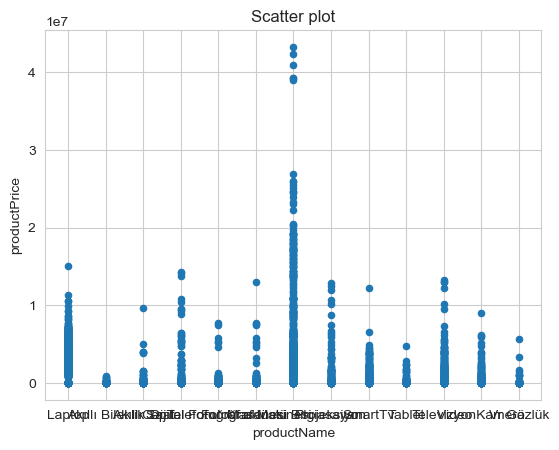

In [90]:
df.plot.scatter(x="productName", y= 'productPrice', title='Scatter plot')

<Axes: title={'center': 'Line chart'}>

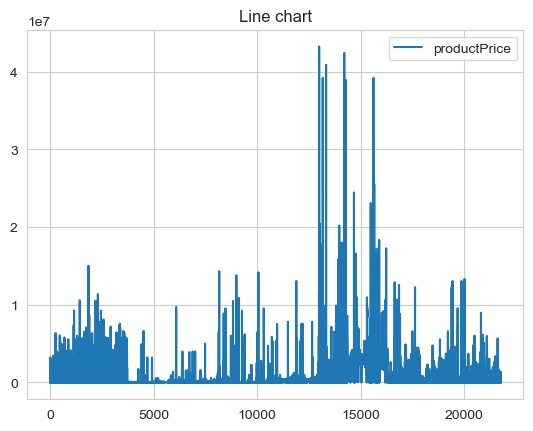

In [91]:
df[["productName", 'productPrice']].plot.line( title='Line chart')

In [92]:
len(df['productName'].unique())

13

<Axes: ylabel='count'>

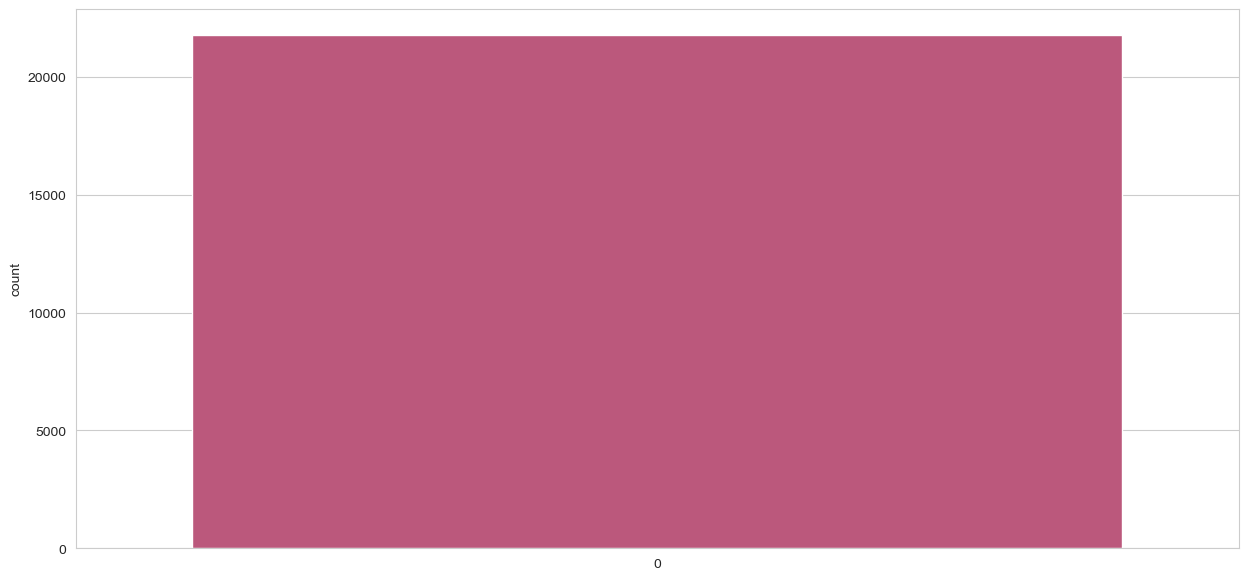

In [93]:
plt.figure(figsize=(15,7))
sns.countplot(df['productPrice'],palette='plasma')

<Axes: ylabel='productPrice'>

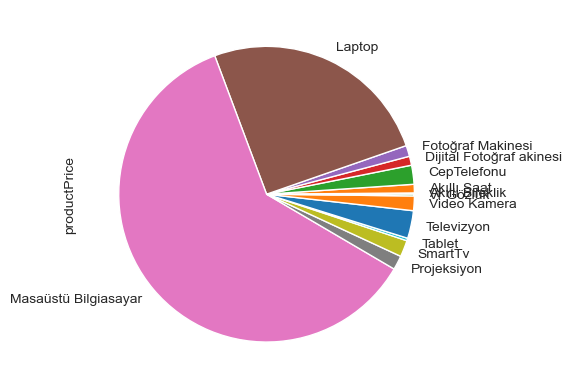

In [94]:
df.groupby('productName')['productPrice'].sum().plot(kind = 'pie')

In [95]:
#!pip install neattext

In [96]:
# Text Cleaning to remove stopwords
import neattext.functions as nfx

In [97]:
# removing all the stopwords

df['product_Info'] = df['productInfo'].apply(nfx.remove_shortwords)
df['product_Info'].iloc[1:5]

1    Nirvana X600 139H DF00X Intel Core 11390H NVME...
2            Vostro 3520 1135G7 FreeDos N2062PVNB3520U
3    Excalibur G870 1265 DFA0X Intel Core 12650H 32...
4    Nirvana C370 4020 4C00B Intel Celeron N4020 12...
Name: product_Info, dtype: object

In [98]:
# head on head comparision
temp = df[['product_Info','productName']]

temp.head()

,product_Info,productName
0,Core 1135G7 İşlemci 256GB Freedos Laptop Kömür...,Laptop
1,Nirvana X600 139H DF00X Intel Core 11390H NVME...,Laptop
2,Vostro 3520 1135G7 FreeDos N2062PVNB3520U,Laptop
3,Excalibur G870 1265 DFA0X Intel Core 12650H 32...,Laptop
4,Nirvana C370 4020 4C00B Intel Celeron N4020 12...,Laptop


In [99]:
#pip install collections 

In [100]:
# we can observe special characters in clean title,we'll remove them

df['product_Info'] = df['product_Info'].apply(nfx.remove_special_characters)
df['product_Info'].iloc[1:5]

1    Nirvana X600 139H DF00X Intel Core 11390H NVME...
2            Vostro 3520 1135G7 FreeDos N2062PVNB3520U
3    Excalibur G870 1265 DFA0X Intel Core 12650H 32...
4    Nirvana C370 4020 4C00B Intel Celeron N4020 12...
Name: product_Info, dtype: object

In [101]:
# tokenisation

all_title_list = df['product_Info'].to_list()

all_title_list[1:5]

['Nirvana X600 139H DF00X Intel Core 11390H NVME GEN4 Freedos',
 'Vostro 3520 1135G7 FreeDos N2062PVNB3520U',
 'Excalibur G870 1265 DFA0X Intel Core 12650H 32GB NVME GEN4 RTX4050 Freedos',
 'Nirvana C370 4020 4C00B Intel Celeron N4020 120GB Windows Home']

In [102]:
alltokens = [token for line in all_title_list for token in line.split()]

print(len(alltokens))

print(alltokens[1:4])

156146
['1135G7', 'lemci', '256GB']


In [103]:
## top50 frequently used words 

from collections import Counter

freq_words = dict(Counter(alltokens).most_common(50))

freq_words

{'Intel': 2754,
 'Akll': 2657,
 'Core': 2523,
 'Ekran': 2365,
 'Bilgisayar': 2228,
 'Saat': 2035,
 'Smart': 1979,
 'Freedos': 1891,
 'Fotoraf': 1889,
 'Masast': 1657,
 'Makinesi': 1577,
 'Garantili': 1523,
 'Mini': 1523,
 'Ultra': 1456,
 'Kamera': 1416,
 'Watch': 1396,
 '16GB': 1287,
 '16gb': 1178,
 '512GB': 1175,
 'Uyumlu': 1143,
 'Android': 1142,
 'Siyah': 1138,
 'Uydu': 1135,
 'Windows': 1113,
 'Alcl': 1093,
 'Instax': 1054,
 'Telefonu': 1029,
 'iPhone': 1023,
 'Trkiye': 974,
 '32GB': 946,
 'Yenilenmi': 914,
 '4050': 782,
 'Victus': 736,
 'Dijital': 734,
 'Ryzen': 733,
 'Tanabilir': 723,
 'Seti': 691,
 '512gb': 690,
 'Film': 674,
 '256gb': 670,
 'Galaxy': 633,
 'Mavi': 625,
 'Beyaz': 622,
 '13700H': 619,
 'ocuk': 603,
 'Full': 601,
 'ANTA': 601,
 'PER4': 594,
 '1080p': 590,
 'Pembe': 571}

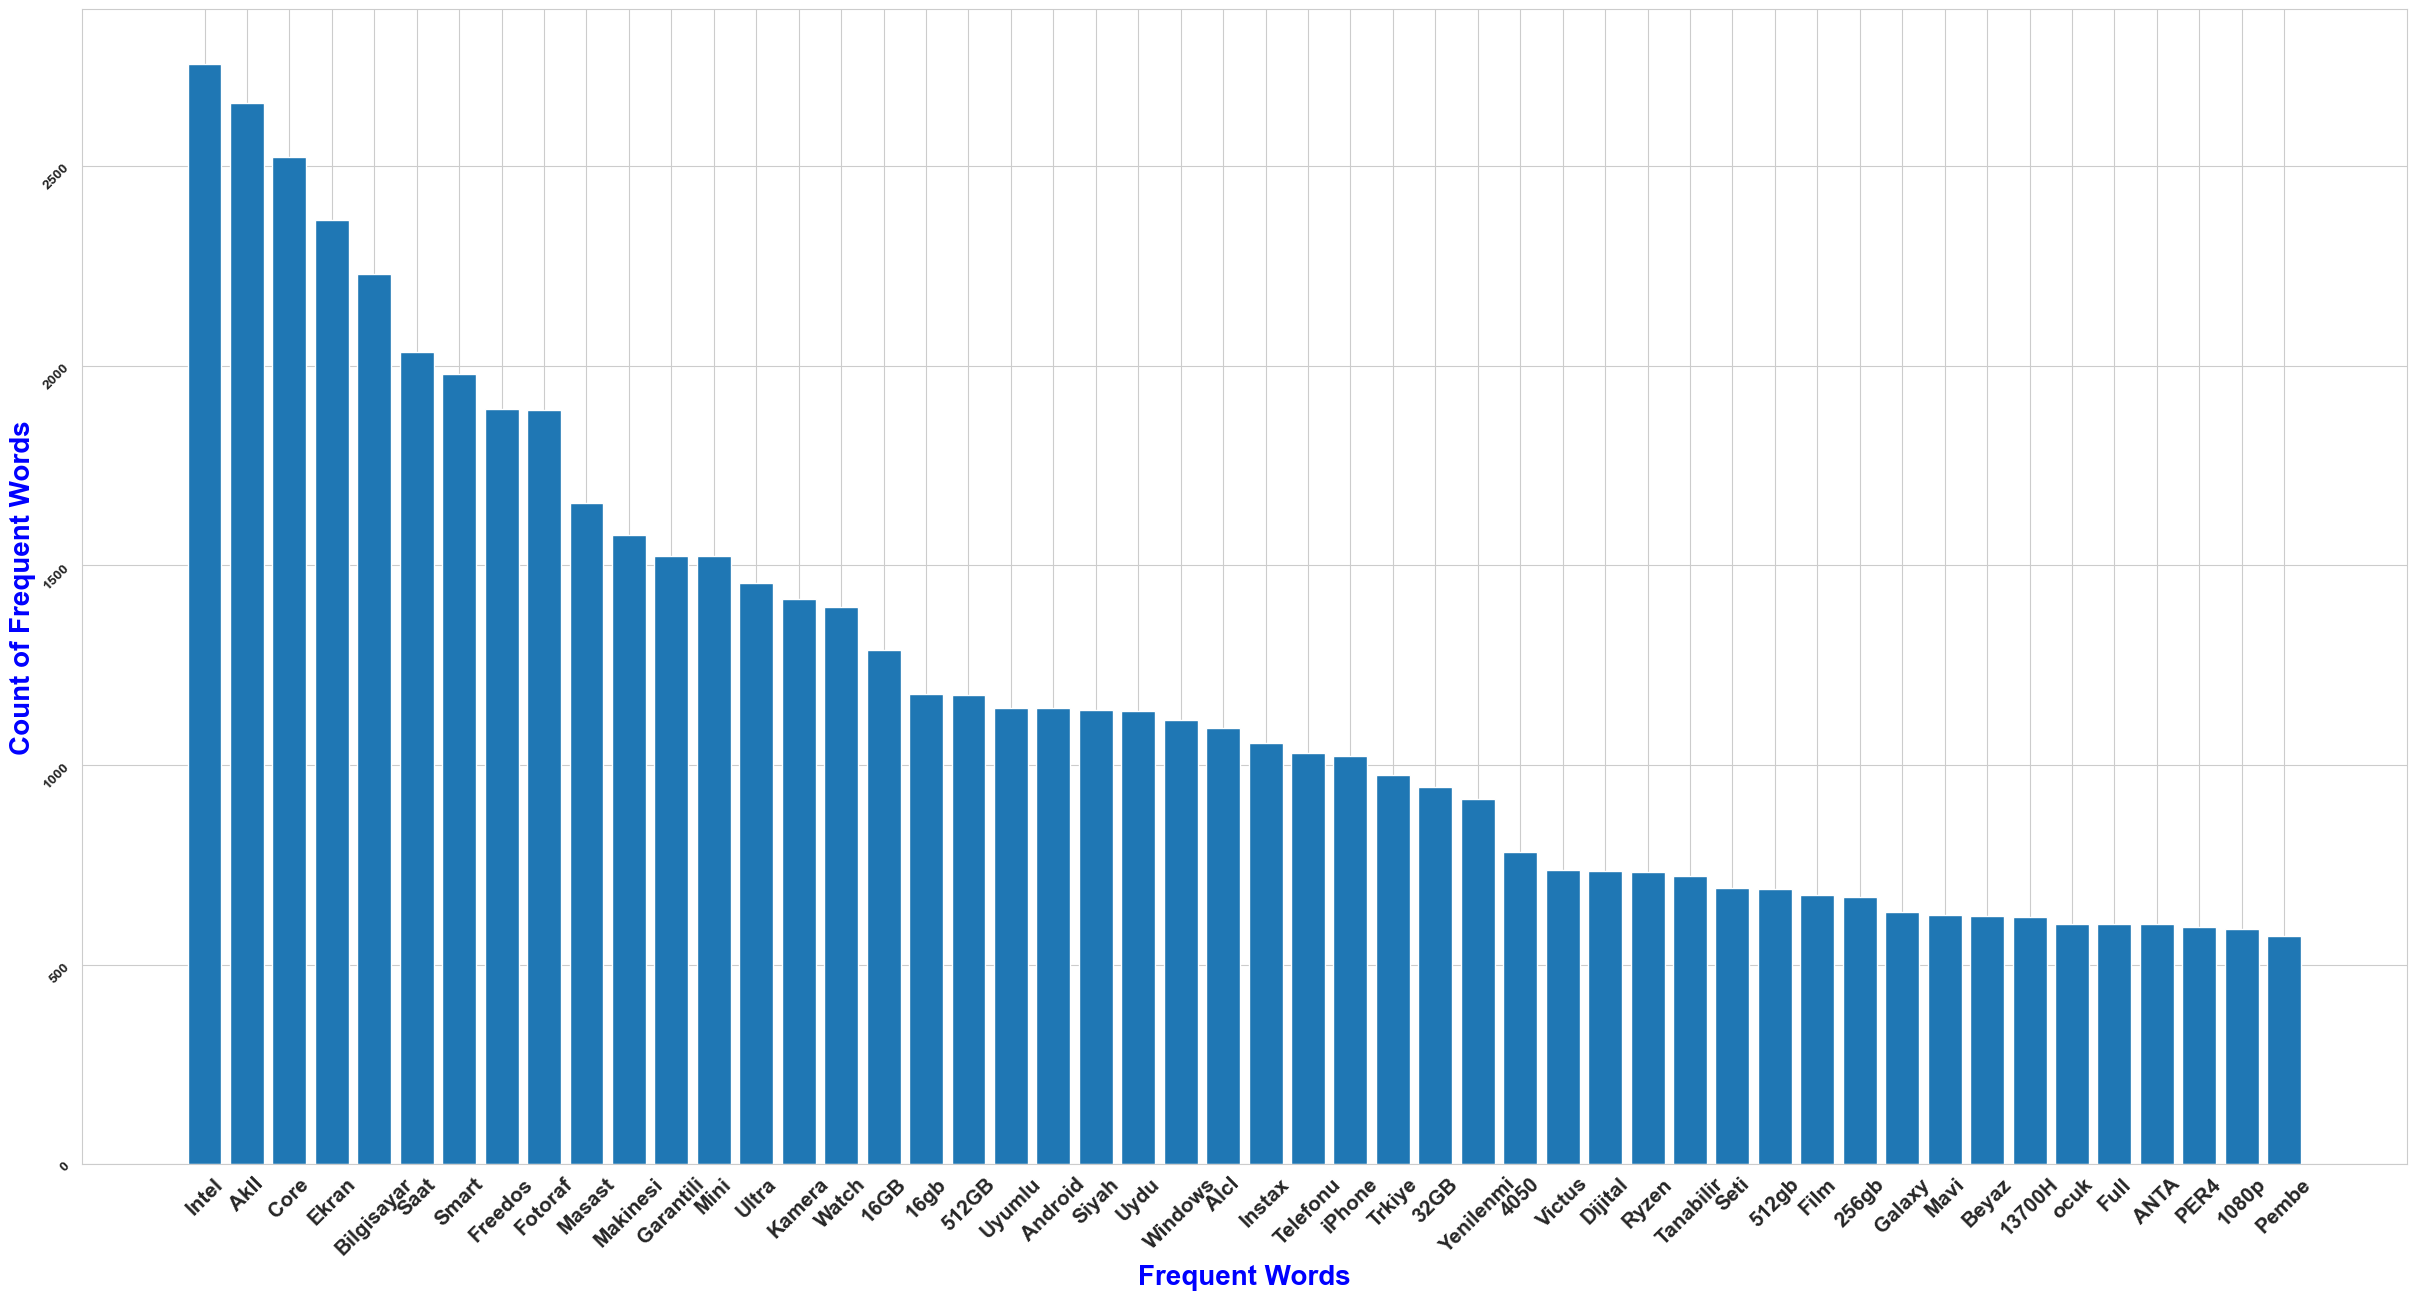

In [104]:
plt.figure(figsize=(30,15))
plt.bar(*zip(*freq_words.items()))
plt.xticks(rotation = 45)

plt.xticks(fontsize = 15,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 10,fontweight = 'bold',rotation = 45)
plt.xlabel('Frequent Words',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Count of Frequent Words',fontsize = 20,fontweight = 'bold',
           color = 'blue')

plt.show()

In [105]:
#!pip install rake_nltk

#### Tokenization

In [106]:
#pip install punkt

In [107]:
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TreebankWordTokenizer

In [108]:
#pip install textBlob

In [109]:
#pip install STOPWORDS

In [110]:
#pip install pickle

In [111]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [112]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [113]:
from rake_nltk import Rake
rake = Rake()

allwords = ''.join(alltokens)

rake.extract_keywords_from_text(allwords)

In [114]:
rake.get_ranked_phrases_with_scores()

[(1.0,
  'core1135g7lemci256gbfreedoslaptopkmrgrisi853u8esnirvanax600139hdf00xintelcore11390hnvmegen4freedosvostro35201135g7freedosn2062pvnb3520uexcaliburg8701265dfa0xintelcore12650h32gbnvmegen4rtx4050freedosnirvanac37040204c00bintelceleronn4020120gbwindowshomeabraintelcore12450h4050freedosmacbook256gbmacostanabilirbilgisayaruzaygrisiabraintelcore13700h4050freedosideapadryzen5700u16gb512gbfreedos82r4006ftra38aspirea315510p38x0nteln305ddr5freedoskdheynirvanax6005700bf00xryzen5700u16gbnvmedizstbilgisayarg8701265dxb0xintelcore12650h32gbnvmertx4060freedosideapad1intelceleronn4120128gbemmccloudgreylaptoplenovotrkiyegarantiligaming11400htbssdrtx3050homefx506hchn011bt74abraintelcore11800h32gb3050freedos12500h405016gb512gbekranwin11ngilizceklavyematebook1155g7ilemci512gblaptopmistikgmpavilioneh3011ntryzen7530u512gbgmlaptoptrkiyegarantilitulparintelcore12650h4060freedosabraintelcore12450h4050freedosideapad15alc782r400f1tr5700u256gbfreedostanabilirbilgisayaraspireryzen7320u256gbdizstbilgisayarac

In [117]:
df.to_csv("urunTavsiye.csv")